In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('../data/placement.csv')

In [39]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [40]:
df.sample(5)

,cgpa,placement_exam_marks,placed
690,7.01,26.0,0
547,7.33,39.0,0
724,7.95,21.0,0
407,8.23,20.0,1
842,7.33,14.0,1


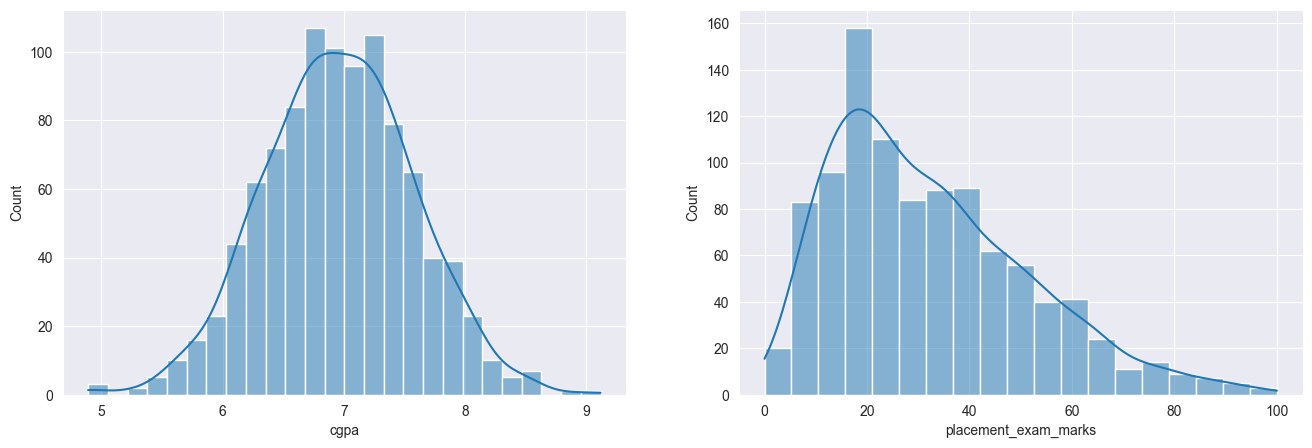

In [41]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [42]:
print('mean cgpa : ',df['cgpa'].mean())
print('std of cgpa : ', df['cgpa'].std())
print('min of cgpa : ', df['cgpa'].min())
print('max of cgpa : ', df['cgpa'].max())

mean cgpa :  6.96124
std of cgpa :  0.6158978751323896
min of cgpa :  4.89
max of cgpa :  9.12


In [43]:
#boundary values of cgpa
print('Highest allowed : ', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed : ', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed :  8.808933625397168
Lowest allowed :  5.113546374602832


In [44]:
#finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


Trimming Method To Remove Outliers

In [45]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
457,6.58,20.0,0
318,6.74,60.0,0
533,7.19,15.0,0
96,7.09,28.0,1
844,7.62,18.0,1


In [46]:
new_df.shape

(995, 3)

In [47]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [48]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [49]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [52]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [53]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


Capping


In [55]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [58]:
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [59]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [60]:
df.shape

(1000, 4)

In [63]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64